***Data Scientist Salary and Subsequent Affordable Rent in New York City***                               
Nina Ysabel Alinsonorin                                               
DS 4003 Sprint #2

***Why This Data?***

I chose this data as I am greatly passionate about both data science (as a career) and living in New York City! Further than that, the apartment-market in NYC is one that is extremely competitive and stressful, and I believe that this application would be a niche, but helpful outlet for those working in the data science field to seek help from. With the help of this dataset, which combines two csvs containing rent prices per borough and various salaries per specified experience and job level, users who are both working in the field of data science and looking to move to New York City would have an app to come to in order to make the apartment search easier.

***Import Dependencies/Cleaning***

In [2]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
# import both csv's and viewing rent csv
rent = pd.read_csv("manhattan.csv")
salary = pd.read_csv("Dataset.csv")
merge = pd.read_csv("NYC-Airbnb-2023.csv")
rent.head()

/var/folders/6r/7sqpy5l13f919nmkgplgqsz80000gn/T/ipykernel_28726/3915227446.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  merge = pd.read_csv("NYC-Airbnb-2023.csv")


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


*Cleaning Rent CSV*

In [4]:
# dropping rental_id variable as the numerical id of an apartment listing won't have an effect on analysis (cross-correlating rent prices by salary)
rent = rent.drop('rental_id', axis=1)
rent.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


*Cleaning Salary CSV*

In [5]:
# view pre-cleaned csv 
salary.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [6]:
# dropping columns that don't have an effect: 
# work_year is dropped because all of the salaries are from the same year (2023) so it wouldn't be of any help unless it had different years which could reflect changes in salaries over time
# salary_currency is dropped because this app is intended for use by users at the least based in the United States, but primarily for those moving to New York City, so foreign salaries will not be beneficial as rent prices are listed in USD 
# salary is dropped because, as mentioned above, foreign salaries will not be beneficial, and salary_in_usd will be used instead of this variable
# employee_residence is dropped because it doesn't really matter where the employee currently lives as they would be intending to move to New York (unless there was a variable depicting locality pay then something could have been done with this)
# company_location is dropped because where the person works now will not have an effect (as the person is using the app intending to move to NYC as their job is there)
# company_size is dropped because it does not have an effect on what the user will be able to afford for rent based on their salary 
salary = salary.drop(['work_year','salary_currency','salary','employee_residence','company_location','company_size'], axis=1)


In [7]:
# view cleaned dataframe
salary.head()

,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting
0,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid
1,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person


*Cleaning Merge*

In [8]:
merge.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [9]:
merge = merge.drop(['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'], axis=1)
merge.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt


In [10]:
merge = merge.drop(['name', 'host_id','host_name','room_type'], axis=1)
merge.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude
0,2595,Manhattan,Midtown,40.75356,-73.98559
1,5121,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512
2,5203,Manhattan,Upper West Side,40.80380,-73.96751
3,5178,Manhattan,Midtown,40.76457,-73.98317
4,5136,Brooklyn,Sunset Park,40.66265,-73.99454


*Merging All CSVs*

In [11]:
# add a common index column to DataFrames for merging
salary['index'] = salary.index
rent['index'] = rent.index
merge['index'] = merge.index

data_frames = [salary, rent, merge]

# merge dataframes on index
df_merged = reduce(lambda left, right: pd.merge(left,right,on=['index'],
                                                how='outer'), data_frames)

# drop index
df_merged = df_merged.drop(["index","neighborhood","borough","id"], axis=1)

df_merged.head()

,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,rent,bedrooms,bathrooms,size_sqft,...,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighbourhood_group,neighbourhood,latitude,longitude
0,Data DevOps Engineer,Data Engineering,95012.0,Mid-level,Full-time,Hybrid,2550.0,0.0,1.0,480.0,...,0.0,0.0,1.0,1.0,0.0,1.0,Manhattan,Midtown,40.75356,-73.98559
1,Data Architect,Data Architecture and Modeling,186000.0,Senior,Full-time,In-person,11500.0,2.0,2.0,2000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512
2,Data Architect,Data Architecture and Modeling,81800.0,Senior,Full-time,In-person,4500.0,1.0,1.0,916.0,...,0.0,1.0,1.0,1.0,0.0,0.0,Manhattan,Upper West Side,40.80380,-73.96751
3,Data Scientist,Data Science and Research,212000.0,Senior,Full-time,In-person,4795.0,1.0,1.0,975.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Manhattan,Midtown,40.76457,-73.98317
4,Data Scientist,Data Science and Research,93300.0,Senior,Full-time,In-person,17500.0,2.0,2.0,4800.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Brooklyn,Sunset Park,40.66265,-73.99454


In [12]:
# melt the dataframe to make it "tidy"
final = pd.melt(df_merged, id_vars=['job_title', 'job_category', 'salary_in_usd', 'experience_level', 'employment_type', 'work_setting', 'neighbourhood_group','neighbourhood', 'rent','latitude','longitude'],
                    var_name='amenity', value_name='amenity_value')

# view the melted and final dataframe to be used for analysis
final.head()

,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,neighbourhood_group,neighbourhood,rent,latitude,longitude,amenity,amenity_value
0,Data DevOps Engineer,Data Engineering,95012.0,Mid-level,Full-time,Hybrid,Manhattan,Midtown,2550.0,40.75356,-73.98559,bedrooms,0.0
1,Data Architect,Data Architecture and Modeling,186000.0,Senior,Full-time,In-person,Brooklyn,Bedford-Stuyvesant,11500.0,40.68535,-73.95512,bedrooms,2.0
2,Data Architect,Data Architecture and Modeling,81800.0,Senior,Full-time,In-person,Manhattan,Upper West Side,4500.0,40.80380,-73.96751,bedrooms,1.0
3,Data Scientist,Data Science and Research,212000.0,Senior,Full-time,In-person,Manhattan,Midtown,4795.0,40.76457,-73.98317,bedrooms,1.0
4,Data Scientist,Data Science and Research,93300.0,Senior,Full-time,In-person,Brooklyn,Sunset Park,17500.0,40.66265,-73.99454,bedrooms,2.0


In [13]:
final.to_csv('nycdata.csv', index=False)
# saving merged dataframe as one csv called "data.csv"

***Exploratory Data Analysis (EDA)*** 

*Observations*                          
There are 49,546 observations per column, making for a total of 545,006 observations in the entire dataset.

In [14]:
final.count()

job_title              130970
job_category           130970
salary_in_usd          130970
experience_level       130970
employment_type        130970
work_setting           130970
neighbourhood_group    601034
neighbourhood          601034
rent                    49546
latitude               601034
longitude              601034
amenity                601034
amenity_value           49546
dtype: int64

*Unique*                                   
For this data set, there are many unique variables for categorical variables, showing the wide variety of options available: 
- job_title: There are ***80*** different job titles available within the data science field to select from 
- job_category: There are ***9*** different job categories
- experience_level: There are ***4*** separate job levels 
- employment_type: There are ***4*** different types of employment 
- work_setting: There are ***3*** different work settings 
- neighborhood: Within New York City, there are ***32*** different neighborhoods 
- borough: Based on this dataset, there is ***1*** borough
- amenity: In the apartments available for rent in NYC, there are ***14*** separate amenities available

In [15]:
final.nunique()

job_title                125
job_category              10
salary_in_usd           1786
experience_level           4
employment_type            4
work_setting               3
neighbourhood_group        5
neighbourhood            223
rent                     854
latitude               22673
longitude              20130
amenity                   14
amenity_value           1148
dtype: int64

*Missing Data*


Because of the data cleaning done above, the potential missing values were already expunged from the dataset; so, there are no more missing values throughout all variables.

In [16]:
# iterates through the data and chains the isnull command (to see if there are any missing values) with the sum command to get the total amount of missing values per specified variable

mtitle = final['job_title'].isnull().sum()
print("Missing observations in job_title: ", mtitle)

mcat= final['job_category'].isnull().sum()
print("Missing observations in job_category: ", mcat)

msalary = final['salary_in_usd'].isnull().sum()
print("Missing observations in salary_in_usd: ", msalary)

mexp = final['experience_level'].isnull().sum()
print("Missing observations in experience_level: ", mexp)

memp = final['employment_type'].isnull().sum()
print("Missing observations in employment_type: ", memp)

mws = final['work_setting'].isnull().sum()
print("Missing observations in work_setting: ", mws)

mneighborhood = final['neighborhood'].isnull().sum()
print("Missing observations in neighborhood: ", mneighborhood)

mborough = final['borough'].isnull().sum()
print("Missing observations in borough: ", mborough)

mrent = final['rent'].isnull().sum()
print("Missing observations in rent: ", mrent)

man = final['amenity'].isnull().sum()
print("Missing observations in amenity: ", man)

mav = final['amenity_value'].isnull().sum()
print("Missing observations in amenity_value: ", mav)

Missing observations in job_title:  470064
Missing observations in job_category:  470064
Missing observations in salary_in_usd:  470064
Missing observations in experience_level:  470064
Missing observations in employment_type:  470064
Missing observations in work_setting:  470064


KeyError: 'neighborhood'

*Distributions of Continuous Variables*

The continuous variables are *rent* and *salary* as these variables are not limited to specific parameters.

&nbsp; &nbsp; &nbsp; *Distribution of 'rent'*

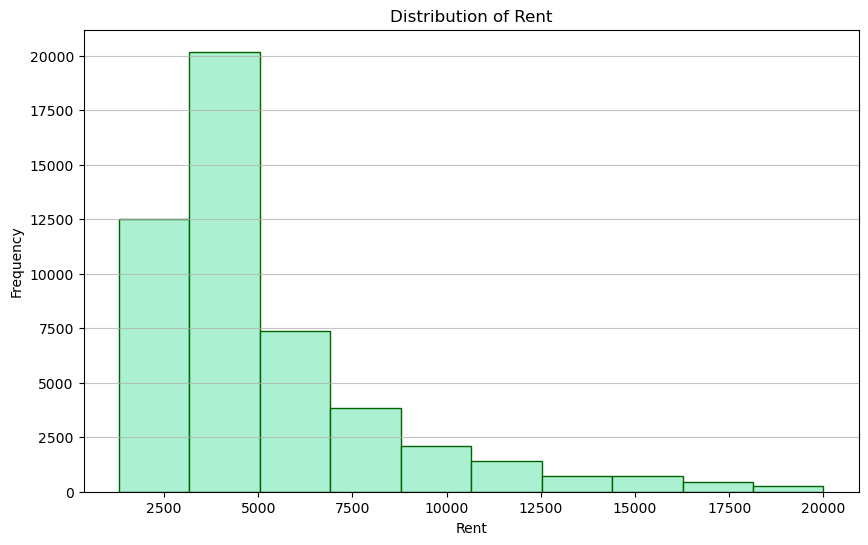

In [ ]:
# histogram using matplotlib to depict distribution of rent 
plt.figure(figsize=(10, 6))
plt.hist(final['rent'], bins=10, color='#aaf0d1', edgecolor='darkgreen')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Distribution of Rent')
plt.grid(axis='y', alpha=0.75)
plt.show()

&nbsp; &nbsp; &nbsp; From the graph, we are able to see that the average cost of rent falls between $3,000 - $5,000 per month, with the lowest rent falling between $1500 - $3,000 per month and the highest falling between $18,000 - $20,000 per month. 

&nbsp; &nbsp; &nbsp; *Distribution of 'salary'*

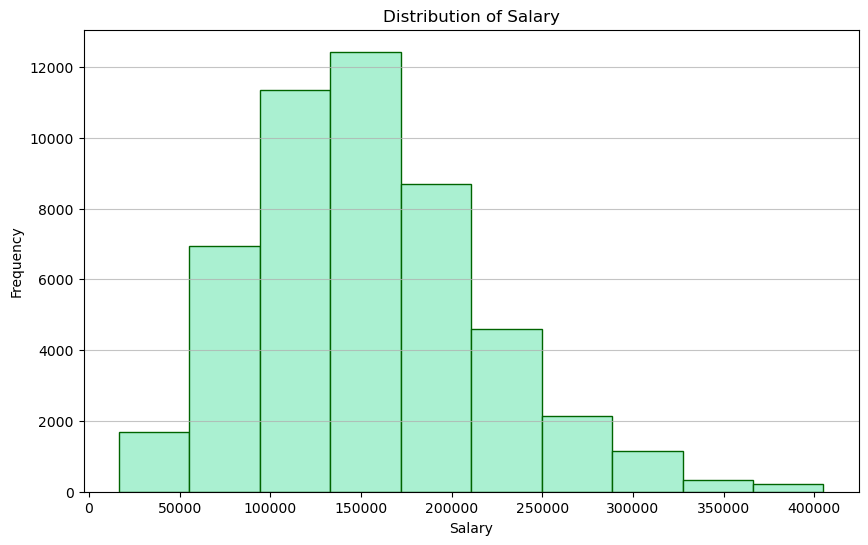

In [ ]:
# histogram using matplotlib to depict distribution of salary
plt.figure(figsize=(10, 6))
plt.hist(final['salary_in_usd'], bins=10, color='#aaf0d1', edgecolor='darkgreen')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.grid(axis='y', alpha=0.75)
plt.show()

&nbsp; &nbsp; &nbsp; From the graph, we are able to see that the average annual salary falls between $125,000 - $175,000, with the lowest annual salary falling between $25,000 - $52,000 and &nbsp; &nbsp; &nbsp; the highest falling between $375,000 - $410,000. 

*Outliers (calculated via Interquartile Range)*

From what the numerical data itself looks like, the potential outliers would come from the salary and rent variables as those have the potential to have greatly varying values (it is more likely that the distribution of rent and salaries will be less uniform than they would be closer in number due to experience level and available amenities.)

&nbsp; &nbsp; &nbsp; *Outliers of 'rent'*

In [ ]:
# Calculate the first quartile (Q1)
Q1 = final['rent'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = final['rent'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for rent:", IQR)

Interquartile Range (IQR) for rent: 2850.0


&nbsp; &nbsp; &nbsp; The IQR is 2850.0, which means that the range of rent values where the middle 50% of the data lies is 2850.0.

***Data Dictionary (in alphabetical order)***

- *amenity* : a string variable describing a feature able to be found in any given apartment (bedrooms, bathrooms, washer, dryer, etc.) 
- *amenity_value* : a numerical variable whose value corresponds with the quantity of a specific amenity as listed in the *amenity* variable 
- *borough* : a string variable which describes the specific borough a given apartment is located 
- *employment_type* : a string variable describes the status of employment (fulltime, partime, etc.) 
- *experience_level* : a string variable which describes the employees level of employment within their job
- *job_category* : a string variable which describes the specific area of employment within the data field 
- *job_title* : a string variable which denotes the title given to the employee based on their role 
- *neighborhood* : within each borough, there are different neighborhoods which are each portrayed through this variable as a string 
- *rent* : a numerical value which reflects the cost of rent for an apartment per month
- *salary_in_usd* : a numerical variable whose values portray the salary of an employee in American-Dollar currency annually
- *work_setting* : a string variable which depicts whether an employee has a work environment that is in-person, hybrid, or remote 


***Possible UI Components and Visualizations***

*UI Components*
- Map View: Display apartments on a map to visualize their locations in different neighborhoods or boroughs. To be used in reference to the first bullet listed under Data Visualizations, having a neutral color scheme which allows for the map of New York City to pop so that user's are able to know where to look/get their results 
- Search Bar: allow users to search for apartments based on criteria such as neighborhood, borough, rent range, etc. 
- Listings View: show detailed listings for apartments, including rent, amenities, and job-related information. 
- Salary Comparison: allow users to compare their salary with the average salary for their job category and experience level in different neighborhoods or boroughs. 
- Saved Listings: enable users to save apartments they are interested in and revisit them later. 

*Data Visualizations* 
- a map of New York City which shows where each available apartment is based on the user's preferences (salary, desired amenities, etc.)
- Neighborhood Comparison: A radar chart comparing different neighborhoods in terms of rent prices, amenities, and job opportunities, helping users choose the best neighborhood based on their preferences. 
- Affordability Heatmap: A heatmap showing the affordability of apartments in different areas based on the user's salary, rent prices, and other factors, helping users identify areas that fit their budget. 
- Rent Distribution: A histogram showing the distribution of rent prices in the selected borough or neighborhood, giving users an idea of the range of rent prices 
- Salary vs. Rent Scatter Plot: A scatter plot comparing salary and rent prices, with each point representing a job with a specific salary and rent, helping users understand the affordability of apartments based on their salary. 
- Amenities Analysis: A pie chart showing the distribution of apartments with different amenities (e.g., gym, dishwasher, patio) in the selected area, helping users prioritize their preferences. 